# 李鲁鲁老师的Python课程 第二课 循环与物理模拟

```
我正在编写Python教学的例子

我希望模拟一个平抛运动，假设将一个小球以

v_x = 30m/s, v_y = 30m/s的速度从高度y = 10m抛出

用最基础的python程序 用Eular法加循环 模拟小球在10s内的运动轨迹，

再进行可视化。
```

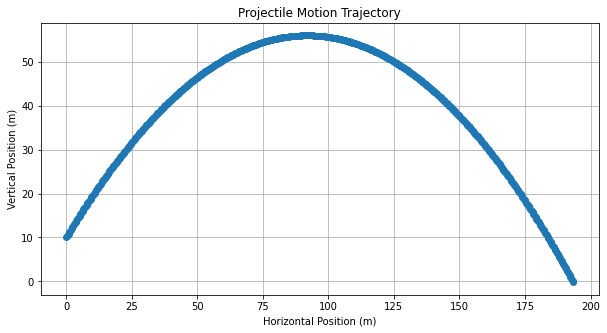

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration (m/s^2)
dt = 0.01  # time step (s)

# Initial conditions
vx = 30  # horizontal velocity (m/s)
vy = 30  # initial vertical velocity (m/s)
x = 0  # initial horizontal position (m)
y = 10  # initial vertical position (m)

# Time simulation
t_final = 10  # total time of simulation (s)
n_steps = int(t_final / dt)  # number of steps

# Lists to store the trajectory points
x_list = [x]
y_list = [y]

# Simulation loop
for _ in range(n_steps):
    # Update positions using the current velocity
    x += vx * dt
    y += vy * dt
    
    # Update vertical velocity due to gravity
    vy -= g * dt
    
    # Append the new positions to the lists
    x_list.append(x)
    y_list.append(y)
    
    # Stop if the ball hits the ground
    if y <= 0:
        break

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_list, y_list, marker='o')
plt.title('Projectile Motion Trajectory')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()


```
帮我实现一个python程序，模拟行星的三体运动

设计三颗质量不同的行星的初始位置和速度

用Eular法模拟行星在一段时间内的运动轨迹

并进行可视化
```


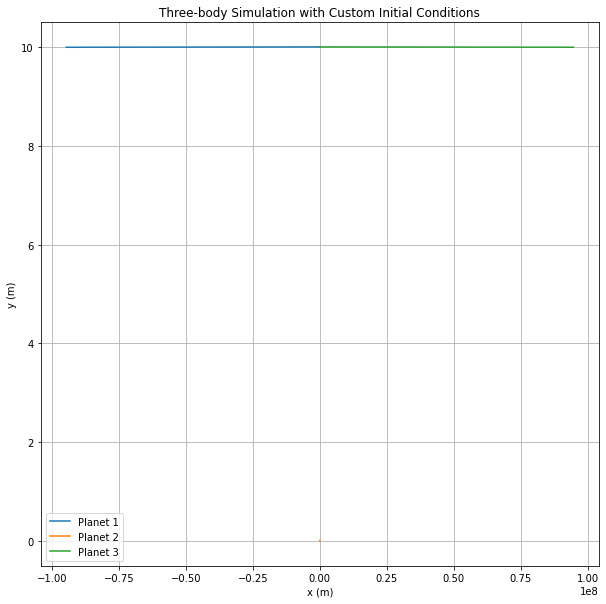

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 常量
G = 6.67430e-11  # 万有引力常数, m^3 kg^-1 s^-2

# 初始化参数
masses = np.array([10, 20, 30], dtype=float)  # 修改后的质量

# 修改后的初始位置和速度
positions = np.array([
    [-10, 10, -11],
    [0, 0, 0],
    [10, 10, 12]
], dtype=float)

velocities = np.array([
    [-3, 0, 0],
    [0, 0, 0],
    [3, 0, 0]
], dtype=float)

dt = 100.0  # 时间步长, s
total_time = 365 * 24 * 3600  # 总模拟时间, s
num_steps = int(total_time / dt)

# 记录位置的数组
trajectories = np.zeros((3, num_steps, 3), dtype=float)

def compute_gravitational_force(m1, m2, r1, r2):
    """ 计算两个物体间的引力 """
    r = r2 - r1
    distance = np.linalg.norm(r)
    force_magnitude = G * m1 * m2 / distance**3
    force = force_magnitude * r
    return force

# 模拟过程
for step in range(num_steps):
    # 记录位置
    trajectories[:, step, :] = positions
    
    # 初始化力
    forces = np.zeros_like(positions)
    
    # 计算每对物体间的引力
    for i in range(3):
        for j in range(i + 1, 3):
            force = compute_gravitational_force(masses[i], masses[j], positions[i], positions[j])
            forces[i] += force
            forces[j] -= force
    
    # 更新速度和位置
    for i in range(3):
        acceleration = forces[i] / masses[i]
        velocities[i] += acceleration * dt
        positions[i] += velocities[i] * dt




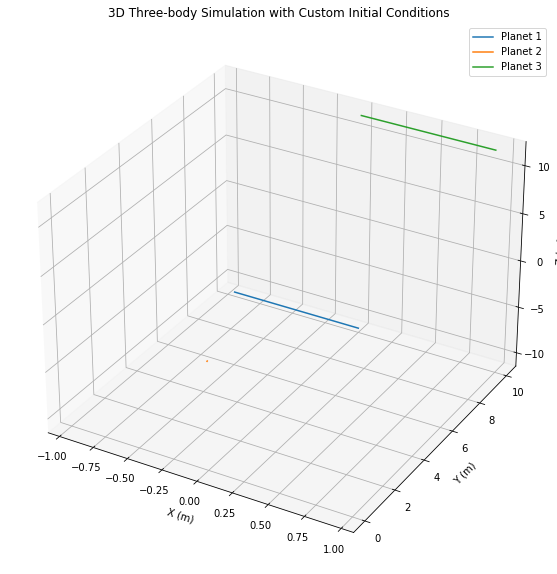

In [15]:
from mpl_toolkits.mplot3d import Axes3D  # 导入三维轴模块
# 三维绘图
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    ax.plot(trajectories[i, :, 0], trajectories[i, :, 1], trajectories[i, :, 2], label=f'Planet {i+1}')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Three-body Simulation with Custom Initial Conditions')
ax.legend()
plt.show()